#Goodness of Fit Testing for Synthetic Data

In [11]:
import os
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import json
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
#generate the distribution
np.random.seed(189)
dist_n = np.random.randn(1000)

#test ad and ks. those are easy
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_b = np.random.binomial(1, 0.5, 1000)

print "poisson on normal", scipy.stats.kstest(dist_b,'norm')
print "poisson on normal", scipy.stats.anderson(dist_b, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold


normal on normal (0.020858285116577835, 0.77700025049383348)
normal on normal (0.26120605502842409, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal (0.5, 0.0)
poisson on normal (179.89971326078694, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.088]


* Comments: 

The threshold 1.088 is the critical value at a 1% level of confidence. Thus, the Anderson-Darling test does not reject the null hypothesis for any of the listed confidence levels in the case where a normal sample is compared to the normal distribution, and that it rejects the corresponding hypothesis for every confidence level below 1% when a Poisson sample is compared to the normal distribution.
The statistic value will be larger if the distributions are not likely to be related. 

* Null hypothesis for each test: 

KS: there are two types of KS: When comparting one sample against one distribution, the null hypothesis is the sample distributes as the reference distribution.

KL: The higher the KL statistic is, the more the sample distribution diverges from the reference distribution. 

AD: A sample is drawn from a population that follows a particular distribution. 

the KL divergence is a little trickier: i have to pass it the values of the distribution at some x's: that means i have to pass it a NORMALIZED HOSTOGRAM OF MY DISTRIBUTION, i.e. derive a PDF from the data. we have done it before!
i have to pass it a function for my comparison distribution evaluated at the x-values where my empirical distribution is evaluated. not just the name of a distribution

In [13]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
#notice the extra comma on the left side of the '=' sign: that tells numpy take the first two values returned, 
#and throw away the rest

then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) evaluated at the bin centers of the histogram from before

In [14]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "poisson on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 

#you can interpret this as a distance: it increases as the distributions diverge

normal on normal 0.00289442712634
poisson on normal 1.69039187158


so it looks like a high value is rejecting the NULL that both empirical distributions come from the same theoretical distribution, because the information divergence is higher between different distributions and smaller between similar distributions.

#Binomial

In [15]:
#create an array of increasing n values

narray = range(1,50,1)

#create an array of zeros to store the specified statistic values for each n in narray

ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

#set the s and the p of the binomial distributions

s = 50
p = 0.5 

#create the distributions 

for i,n in enumerate(narray):
    distb = np.random.binomial(n, p, 1000)
    
    ks_b[i] = scipy.stats.kstest(distb,'norm')[0]
    ad_b[i] = scipy.stats.anderson(distb,'norm')[0]
    
    #create bins and bin centers for the normal distribution (the KL/Entropy test)
    
    bins=np.linspace(min(distb),max(distb), 10) 
    bincenters = bins[:-1]+0.5*(bins[1]-bins[0])
    kl_b[i] = scipy.stats.entropy((np.histogram(distb, bins=bins)[0]), scipy.stats.norm.pdf(bincenters)+n)
    
print "KS Test Statistics: \n",  ks_b

KS Test Statistics: 
[ 0.5         0.60034475  0.70734475  0.78534475  0.81434475  0.86824987
  0.90224987  0.94024987  0.96524987  0.96824987  0.97124987  0.9746501
  0.9806501   0.9916501   0.9956501   0.9956501   0.9966501   0.99896833
  0.9976501   0.99996833  0.99996833  0.99996833  0.9986501   0.99996833
  1.          0.99996833  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.        ]


* Comment on the KS Test:

We observe that as n increases, the test statistic increases as well. This signals that the binomial function is getting  closer to a normal distribution. In the KS test, the function is getting closer to the distribution compared when the test statistic increases. 

In [16]:
print "Anderson Test Statistics:\n",  ad_b

Anderson Test Statistics:
[ 179.82284191   81.59307639   53.10767602   41.13118518   32.88430231
   27.34480007   22.32455985   20.1857649    18.81020663   17.78778328
   14.66428216   13.60912794   11.77239108   12.3906677    11.78735804
    9.57959787    8.97766404    9.17448547    8.14528294    8.52536304
    7.93253571    7.64727326    6.70542685    6.89542485    6.8563189
    6.89886223    6.13953965    7.12764089    5.84134134    5.96616848
    6.22618198    5.49678209    5.07249743    4.99724079    5.08000534
    4.65831955    4.44051854    4.26362469    4.6666466     4.54203108
    4.40356317    4.04964483    4.51593921    3.92911458    4.03751435
    3.73125816    4.12949913    3.80787296    3.33452698]


* Comment on the Anderson Test:

We observe that as n increases, the test statistic decreases. At the same time, the binomial function is getting closer to a normal distribution. In the Anderson-Darling test, the function is getting closer to the distribution compared when the test statistic decreases. 

In [17]:
print "KL Test Statistics:\n", kl_b

KL Test Statistics:
[ 1.51515122  1.15589172  0.94027686  0.80435984  0.6858765   0.5943454
  0.49074515  0.43758526  0.40027092  0.36586652  0.58703184  0.54115307
  0.42025411  0.48813153  0.44504983  0.48900327  0.47053635  0.35068208
  0.41970789  0.4085994   0.41758054  0.38219797  0.54028841  0.40910841
  0.42570069  0.44268072  0.48289444  0.4079791   0.47768156  0.48203961
  0.46023998  0.41498587  0.54453326  0.3707144   0.53937928  0.3529687
  0.35325453  0.56842628  0.34040565  0.49568719  0.4646048   0.51799733
  0.50365516  0.39258104  0.48035964  0.44813449  0.44013866  0.4962911
  0.5817449 ]


* Comment on the KL Test:

We observe that as n increases, the test statistic decreases to a specific point and stays around that point. At the same time, the binomial function is getting closer to a normal distribution. In Kullback Liebler Test, the function is becoming similar to the distribution compared. 

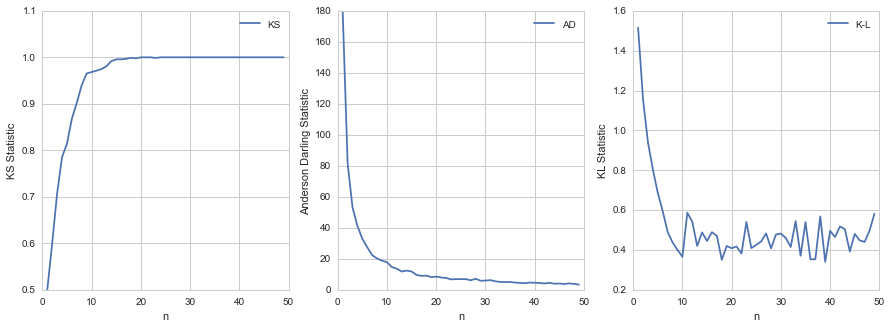

In [18]:
#plotting 

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.ylabel('KS Statistic')
pl.xlabel('n')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.ylabel('Anderson Darling Statistic')
pl.xlabel('n')
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L')
pl.ylabel('KL Statistic')
pl.xlabel('n')
pl.legend()

#Poisson 

In [6]:
#to store the data i am generating an empty array of the size of the values of n i want to test. 
#I do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, 
#but default is float so i do not need any argument other then the length 

In [19]:
#create an array of increasing n values

narray = range(1,50,1)

##create an array of zeros to store the specified statistic values for each n in narray

ks_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))

#set the size for the poisson distributions

s = 50

#create the distributions 

for i,n in enumerate(narray):
    distp = np.random.poisson(n, 1000)
    ks_p[i] = scipy.stats.kstest(distp,'norm')[0]
    ad_p[i] = scipy.stats.anderson(distp,'norm')[0]
    
    #create bins and bin centers for the normal distribution (the KL/Entropy test)
    bins=np.linspace(min(distp),max(distp), 10) 
    bincenters = bins[:-1]+0.5*(bins[1]-bins[0])
    kl_p[i] = scipy.stats.entropy((np.histogram(distp, bins=bins)[0]), scipy.stats.norm.pdf(bincenters)+n)

print "KS Test Statistics: \n",  ks_b

KS Test Statistics: 
[ 0.5         0.60034475  0.70734475  0.78534475  0.81434475  0.86824987
  0.90224987  0.94024987  0.96524987  0.96824987  0.97124987  0.9746501
  0.9806501   0.9916501   0.9956501   0.9956501   0.9966501   0.99896833
  0.9976501   0.99996833  0.99996833  0.99996833  0.9986501   0.99996833
  1.          0.99996833  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.        ]


* Comment on the KS Test:

We observe that as n increases, the test statistic increases as well. This signals that the poisson function is getting closer to a normal distribution. In the KS test, the function is getting closer to the distribution compared when the test statistic increases.

In [20]:
print "Anderson Test Statistics:\n",  ad_b

Anderson Test Statistics:
[ 179.82284191   81.59307639   53.10767602   41.13118518   32.88430231
   27.34480007   22.32455985   20.1857649    18.81020663   17.78778328
   14.66428216   13.60912794   11.77239108   12.3906677    11.78735804
    9.57959787    8.97766404    9.17448547    8.14528294    8.52536304
    7.93253571    7.64727326    6.70542685    6.89542485    6.8563189
    6.89886223    6.13953965    7.12764089    5.84134134    5.96616848
    6.22618198    5.49678209    5.07249743    4.99724079    5.08000534
    4.65831955    4.44051854    4.26362469    4.6666466     4.54203108
    4.40356317    4.04964483    4.51593921    3.92911458    4.03751435
    3.73125816    4.12949913    3.80787296    3.33452698]


* Comment on the Anderson Test:

We observe that as n increases, the test statistic decreases. At the same time, the poisson function is getting closer to a normal distribution. In the Anderson-Darling test, the function is getting closer to the distribution compared when the test statistic decreases.

In [21]:
print "KL Test Statistics:\n", kl_b

KL Test Statistics:
[ 1.51515122  1.15589172  0.94027686  0.80435984  0.6858765   0.5943454
  0.49074515  0.43758526  0.40027092  0.36586652  0.58703184  0.54115307
  0.42025411  0.48813153  0.44504983  0.48900327  0.47053635  0.35068208
  0.41970789  0.4085994   0.41758054  0.38219797  0.54028841  0.40910841
  0.42570069  0.44268072  0.48289444  0.4079791   0.47768156  0.48203961
  0.46023998  0.41498587  0.54453326  0.3707144   0.53937928  0.3529687
  0.35325453  0.56842628  0.34040565  0.49568719  0.4646048   0.51799733
  0.50365516  0.39258104  0.48035964  0.44813449  0.44013866  0.4962911
  0.5817449 ]


* Comment on the KL Test:

We observe that as n increases, the test statistic decreases to a specific point and stays around that point. At the same time, the poisson function is getting closer to a normal distribution. In Kullback Liebler Test, the function is becoming similar to the distribution compared.

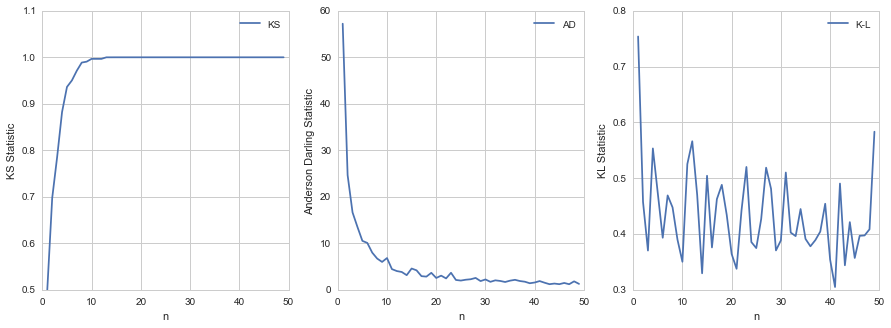

In [22]:
#Plotting

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_p, label='KS')
pl.ylabel('KS Statistic')
pl.xlabel('n')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_p,  label='AD')
pl.ylabel('Anderson Darling Statistic')
pl.xlabel('n')
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_p, label='K-L')
pl.ylabel('KL Statistic')
pl.xlabel('n')
pl.legend()

TOTALLY OPTIONAL fun with KL: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other. you can see what it looks point by point, before you integrate and get a single distance number

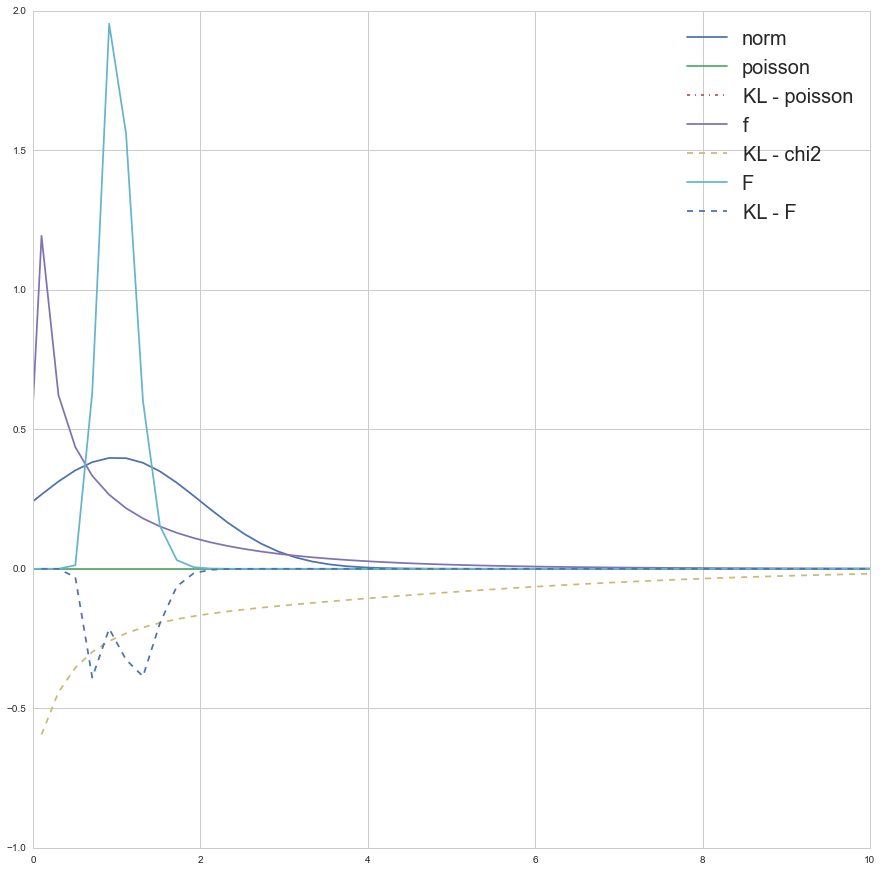

In [23]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)